## 04. Compiling all the plots from literature that show AGN excess as a function of projected separations

The notebook is divided into the following sections:
1. Loading data and defining input parameters
2. Creating the plot

**Script written by**: Soumya Shreeram <br>
**Project supervised by**: Johan Comparat <br>
**Date**: 15th April 2021

In [1]:
import numpy as np
import astropy.units as u
import astropy.io.fits as fits
from astropy.table import Table, Column

# plotting imports
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm, colors, colorbar
from matplotlib.ticker import FormatStrFormatter

# system imports
import os
import sys
import importlib as ib
import pandas as pd
import glob
import scipy.odr as odr
from scipy import interpolate

Load the imported file(s) that contains all the functions used in this notebooks

In [2]:
%matplotlib inline
font = {'family' : 'serif',
        'weight' : 'medium',
        'size'   : 20}
matplotlib.rc('font', **font)

In [3]:
pal = sns.hls_palette(10, h=.5, s=1).as_hex()
blues = sns.color_palette("Blues", 4).as_hex()
greys = sns.color_palette("Greys", 4).as_hex()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth":2})

In [4]:
sys.path.append('../imported_files/')
import plotting_aim03 as pt
import plotting_cswl05 as pt_sim
import Modelling_AGN_fractions_from_literature as mafl
import Comparison_simulation_with_literature_data as cswl
import Agn_incidence_from_Major_Mergers as aimm
import Exploring_DM_Halos as edh
import All_sky as sky

Data directory

In [5]:
lit_dir = '../Data/Literature_plots/'

Optical 

In [6]:
Ellison_11 = np.loadtxt(lit_dir+'E11.txt', skiprows=1)

# Decomposing all the columns from the digitized Ellison et al. file
r_p_E11, f_agn_E11 = mafl.getXY(Ellison_11)

f_agn_err_E11 = [Ellison_11[i][2:4] for i in range(len(Ellison_11))]
r_p_err_E11 = [Ellison_11[i][4:] for i in range(len(Ellison_11))]

Another optical study

In [7]:
Liu_12 = np.genfromtxt(lit_dir+'L12.csv', delimiter=',', skip_header=6)

r_p_L12 = [np.vstack(Liu_12)[i][0] for i in range(len(Liu_12))]
f_agn_L12 = [np.vstack(Liu_12)[i][1] for i in range(len(Liu_12))]
Liu_12_err = np.loadtxt(lit_dir+'L12_yerr.txt', skiprows=1)

Mid-infrared

AGNs were selected using the mid-infrared threshold of $W_1-W_2>0.5$

In [8]:
Satyapal_14 = np.genfromtxt(lit_dir+'S14.csv', delimiter=',', skip_header=6)
Satyapal_14_err = np.loadtxt(lit_dir+'S14_errs.txt', skiprows=1)

# extract info
Satyapal_14 = [Satyapal_14[i][0:2] for i in range(len(Satyapal_14))]
r_p_err_S14, f_agn_err_S14 = mafl.getErrArrays(Satyapal_14_err)

X-rays

In [9]:
Silverman_11 = np.genfromtxt(lit_dir+'Sil11_main.csv', delimiter=',', skip_header=6)
Silverman_11_err = np.loadtxt(lit_dir+'Sil11err.txt', skiprows=1)

# extract info
Silverman_11 = [Silverman_11[i][0:2] for i in range(len(Silverman_11))]
r_p_err_Sil11, f_agn_err_Sil11 = mafl.getErrArrays(Silverman_11_err)

Plotting the AGN fractions from all these different studies

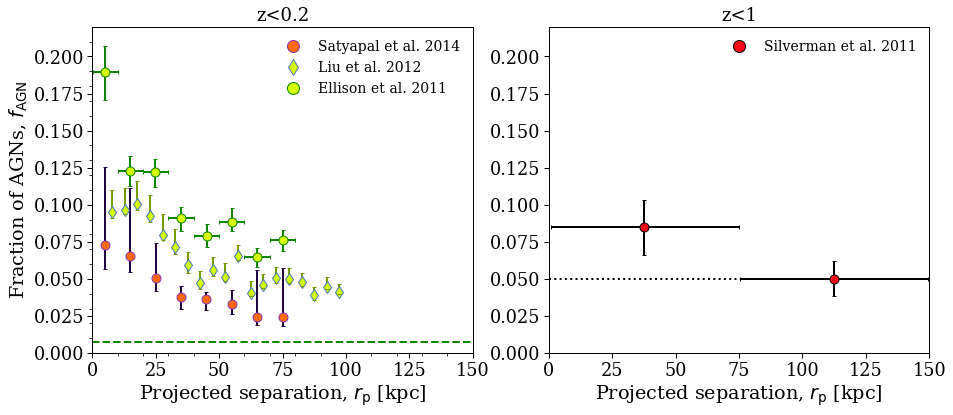

In [10]:
ax_data, out_data = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14, r_p_L12, f_agn_L12, Liu_12_err, Silverman_11, r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11, r_p_err_E11, f_agn_err_E11)
plt.savefig('../figures/close_p_all.png', facecolor='w', edgecolor='w', bbox_inches='tight')

### Adding the results from simulations

In [11]:
# pixel number from the simulation file
pixel_no_cont_arr = sky.allPixelNames()

# get shell volume and projected radius bins [Mpc]
r_p, _ = aimm.shellVolume()

#### z < 2

load the values of deciles that are best suited to represent the data for z<2. Note that these files may have been updated so proceed with this section after verification.

In [12]:
# look back into redshifts until...
redshift_limit = 2
model_tmm_filename = '../Data/pairs_z%.1f/models_%s.fit'%(redshift_limit, 'tmm')
model_xoff_filename = '../Data/pairs_z%.1f/models_%s.fit'%(redshift_limit, 'xoff')

frac_tmm_z2 = Table.read(model_tmm_filename, format='fits')
frac_xoff_z2 = Table.read(model_xoff_filename, format='fits')

models_A, std_A = mafl.generateDecileModels(frac_tmm_z2, frac_xoff_z2)

generate a random palatte of colors for plotting the different models

In [115]:
sns.color_palette("rainbow_r", 5)

[(1.0, 0.4946558433997788, 0.2558427775944356),
 (0.8333333333333335, 0.8660254037844385, 0.4999999999999999),
 (0.49607843137254903, 0.9999810273487268, 0.7092813076058535),
 (0.16666666666666674, 0.8660254037844387, 0.8660254037844386),
 (0.1705882352941177, 0.4946558433997787, 0.9667184042691874)]

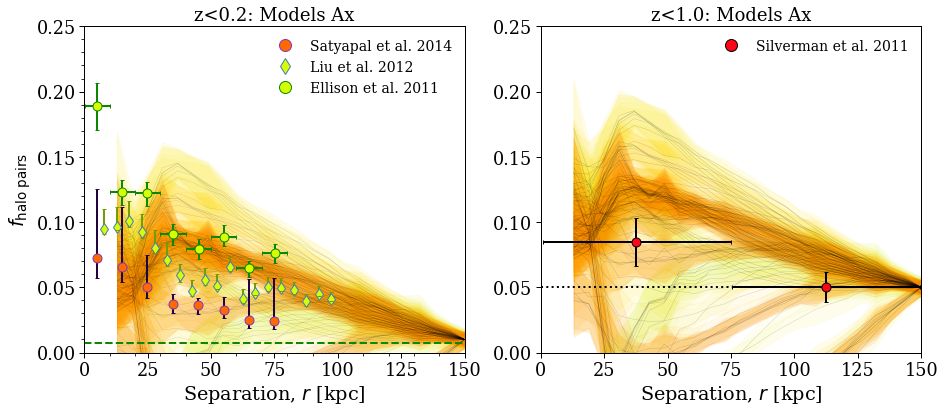

In [118]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
r_kpc = 1e3*r_p[1:]
ib.reload(pt)
pt.plotModels(axs, models_A, std_A, r_kpc)
pt.plotModels(axs, models_A, std_A, r_kpc, left=False)

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')
pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm halo\ pairs}}$', 'z<0.2: Models Ax', ylim=[0., 0.25], legend=False)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0: Models Ax', ylim=[0., 0.25], legend=False)
pt.saveFig('Models_Ax_wistia.png')

#### z<0.2 and z<1

In [13]:
# look back into redshifts until...
redshift_limit = 1
model_tmm_filename = '../Data/pairs_z%.1f/models_%s.fit'%(redshift_limit, 'tmm')
model_xoff_filename = '../Data/pairs_z%.1f/models_%s.fit'%(redshift_limit, 'xoff')

frac_tmm_z1 = Table.read(model_tmm_filename, format='fits')
frac_xoff_z1 = Table.read(model_xoff_filename, format='fits')

# generate models from the deciles
models_B, std_B = mafl.generateDecileModels(frac_tmm_z1, frac_xoff_z1)

# look back into redshifts until...
redshift_limit = .2
model_tmm_filename = '../Data/pairs_z%.1f/models_%s.fit'%(redshift_limit, 'tmm')
model_xoff_filename = '../Data/pairs_z%.1f/models_%s.fit'%(redshift_limit, 'xoff')

frac_tmm_z0_2 = Table.read(model_tmm_filename, format='fits')
frac_xoff_z0_2 = Table.read(model_xoff_filename, format='fits')

# generate models from the deciles
models_C, std_C = mafl.generateDecileModels(frac_tmm_z0_2, frac_xoff_z0_2)

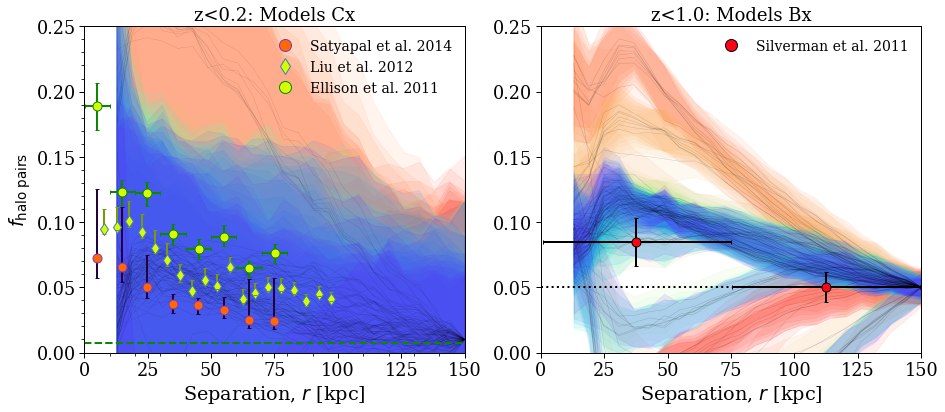

In [117]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
r_kpc = 1e3*r_p[1:]

# overplot with the data
pt.plotModels(axs, models_C, std_C, r_kpc)
pt.plotModels(axs, models_B, std_B, r_kpc, left=False)

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')
pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm halo\ pairs}}$', 'z<0.2: Models Cx', ylim=[0., 0.25], legend=False)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0: Models Bx', ylim=[0., 0.25], legend=False)
pt.saveFig('Models_Cx_Bx.png')

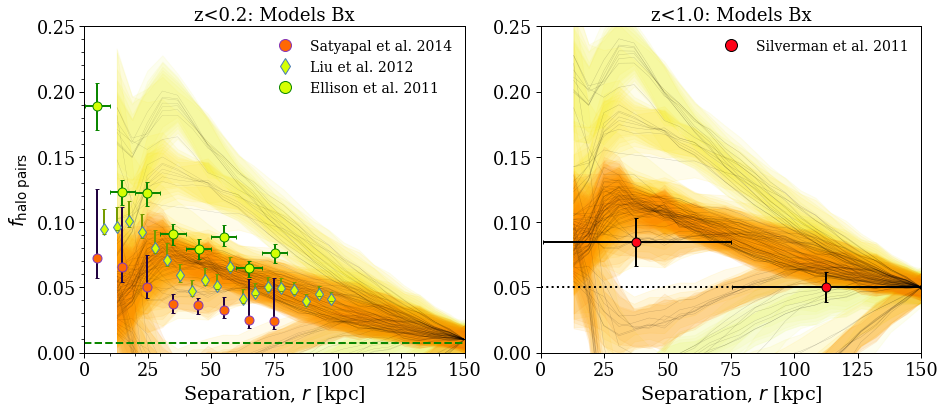

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
r_kpc = 1e3*r_p[1:]

# overplot with the data
pt.plotModels(axs, models_B, std_B, r_kpc)
pt.plotModels(axs, models_B, std_B, r_kpc, left=False)

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')
pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm halo\ pairs}}$', 'z<0.2: Models Bx', ylim=[0., 0.25], legend=False)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0: Models Bx', ylim=[0., 0.25], legend=False)
pt.saveFig('Models_Bx.png')

### Get the best models

In [15]:
E11 = Table.read('../Data/Literature_plots/E11_vals.fit', format='fits')
S14 = Table.read('../Data/Literature_plots/S14_vals.fit', format='fits')
L12 = Table.read('../Data/Literature_plots/L12_vals.fit', format='fits')
Sil11 = Table.read('../Data/Literature_plots/Sil11_vals.fit', format='fits')

# select models above the control
r_kpc = 1e3*r_p[1:]
mse_E11_A, names_E11_A, select_E11_A = mafl.getBestLookingModels(models_A, std_A, E11, r_kpc)
mse_S14_A, names_S14_A, select_S14_A = mafl.getBestLookingModels(models_A, std_A, S14, r_kpc)
mse_L12_A, names_L12_A, select_L12_A = mafl.getBestLookingModels(models_A, std_A, L12, r_kpc)
mse_Sil11_A, names_Sil11_A, select_Sil11_A = mafl.getBestLookingModels(models_A, std_A, Sil11, r_kpc, left=False)


mse_E11_B, names_E11_B, select_E11_B = mafl.getBestLookingModels(models_B, std_B, E11, r_kpc)
mse_S14_B, names_S14_B, select_S14_B = mafl.getBestLookingModels(models_B, std_B, S14, r_kpc)
mse_L12_B, names_L12_B, select_L12_B = mafl.getBestLookingModels(models_B, std_B, L12, r_kpc)
mse_Sil11_B, names_Sil11_B, select_Sil11_B = mafl.getBestLookingModels(models_B, std_B, Sil11, r_kpc, left=False)

Best model out of 67 t2_x7
Best model out of 67 t9_x7
Best model out of 67 t1_x5
Best model out of 13 t7_x0
Best model out of 70 t1_x8
Best model out of 70 t2_x8
Best model out of 70 t9_x7
Best model out of 9 t9_x4


Best model out of 67 t2_x7
Best model out of 67 t9_x7
Best model out of 67 t1_x5
Best model out of 13 t7_x0


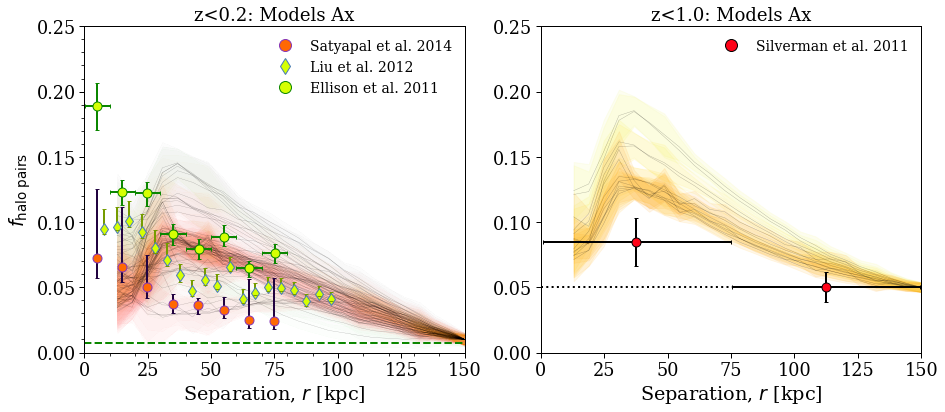

In [141]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
r_kpc = 1e3*r_p[1:]
ib.reload(pt)
ib.reload(mafl)

# overplot with the data
pt.plotModels(axs, select_E11_A[0], select_E11_A[1], r_kpc)
pt.plotModels(axs, select_S14_A[0], select_S14_A[1], r_kpc)
pt.plotModels(axs, select_L12_A[0], select_L12_A[1], r_kpc)
pt.plotModels(axs, select_Sil11_A[0], select_Sil11_A[1], r_kpc, left=False)

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')
pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm halo\ pairs}}$', 'z<0.2: Models Ax', ylim=[0., 0.25], legend=False)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0: Models Ax', ylim=[0., 0.25], legend=False)
pt.saveFig('Good_model_Ax.png')

Best model out of 70 t1_x8
Best model out of 70 t2_x8
Best model out of 70 t9_x7
Best model out of 9 t9_x4


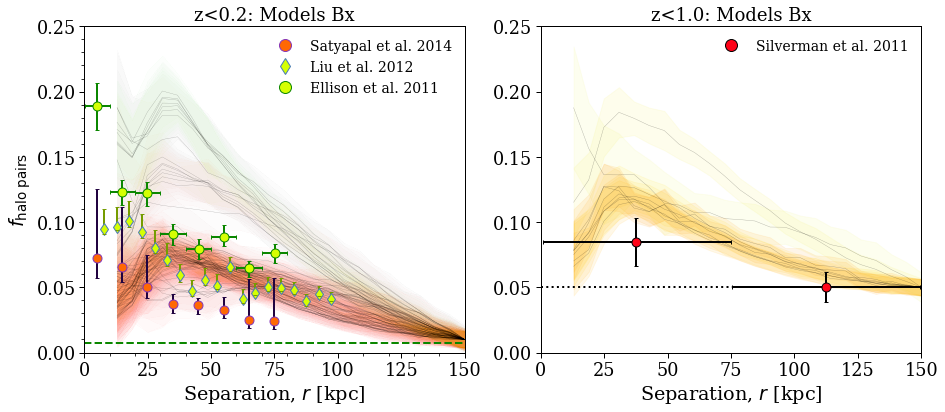

In [140]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
r_kpc = 1e3*r_p[1:]
ib.reload(pt)
ib.reload(mafl)

# overplot with the data
pt.plotModels(axs, select_E11_B[0], select_E11_B[1], r_kpc)
pt.plotModels(axs, select_S14_B[0], select_S14_B[1], r_kpc)
pt.plotModels(axs, select_L12_B[0], select_L12_B[1], r_kpc)
pt.plotModels(axs, select_Sil11_B[0], select_Sil11_B[1], r_kpc, left=False)

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')
pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm halo\ pairs}}$', 'z<0.2: Models Bx', ylim=[0., 0.25], legend=False)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0: Models Bx', ylim=[0., 0.25], legend=False)
pt.saveFig('Good_model_Bx.png')

In [18]:
selected_A = [select_E11_A, select_S14_A, select_Sil11_A, select_L12_A]
selected_B = [select_E11_B, select_S14_B, select_Sil11_B, select_L12_B]

names_A = [names_E11_A, names_S14_A, names_Sil11_A, names_L12_A]
names_B = [names_E11_B, names_S14_B, names_Sil11_B, names_L12_B]

asymotote_value = [0.01, 0.05]

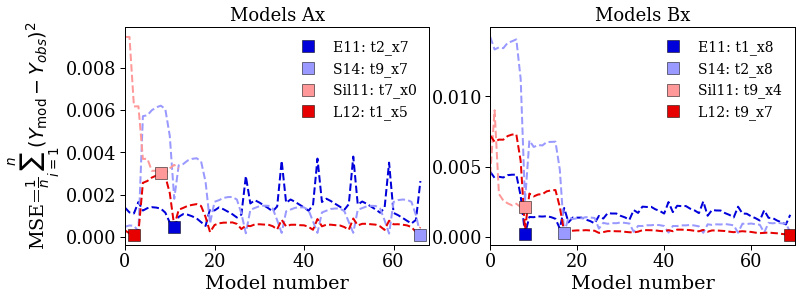

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
pal = sns.color_palette("seismic", 4).as_hex()
label = ['E11: ', 'S14: ', 'Sil11: ', 'L12: ']

min_mse_arr_A, label_A_arr, min_mse_arr_B, label_B_arr = [], [], [], []
ax0, ax1 = ax
for i, mse in enumerate([mse_E11_A, mse_S14_A, mse_Sil11_A, mse_L12_A]):
    ax0, min_mse_A, label_A = pt.plotMSEdist(ax0, mse, pal, i, names_A, label)
    min_mse_arr_A.append(min_mse_A)
    label_A_arr.append(label_A)
    
for i, mse in enumerate([mse_E11_B, mse_S14_B, mse_Sil11_B, mse_L12_B]):
    ax1, min_mse_B, lable_B = pt.plotMSEdist(ax1, mse, pal, i, names_B,label)
    min_mse_arr_B.append(min_mse_B)
    label_B_arr.append(lable_B)

fig.patch.set_facecolor('white')
pt.setLabel(ax0, r'Model number', r'MSE=$\frac{1}{n}\sum_{i=1}^n (Y_{\rm mod}-Y_{obs})^2$', 'Models Ax', xlim=[0, 68])
pt.setLabel(ax1, r'Model number', '', 'Models Bx', xlim=[0, 70])
pt.saveFig('MSE_evaluated.png')

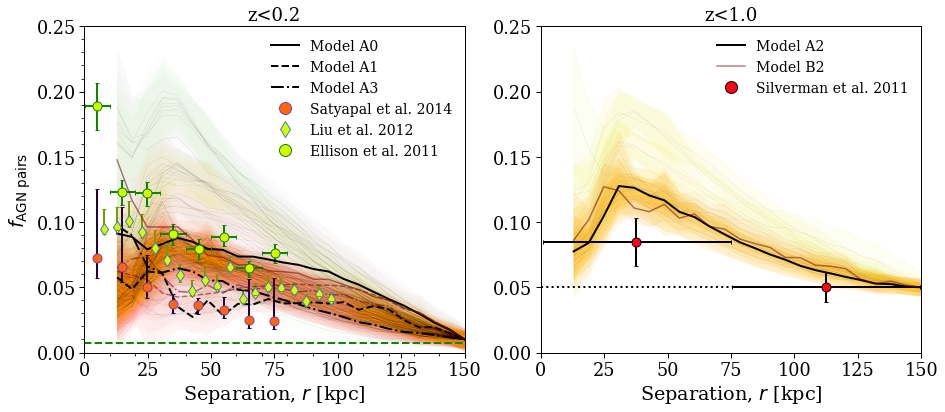

In [137]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

pt.plotSelectedModels(axs, selected_A, selected_B, r_kpc)
ls = ['-', '--', ':', '-.']

for idx, (mse_A, mse_B) in enumerate(zip(min_mse_arr_A, min_mse_arr_B)):
    mA, mB = selected_A[idx][0][mse_A], selected_B[idx][0][mse_B]
    sA, sB = selected_A[idx][1][mse_A], selected_B[idx][1][mse_B]
    if idx == 2:
        mA = mafl.normalizeAsymptote(mA, asymotote_value=asymotote_value[1])
        mB = mafl.normalizeAsymptote(mB, asymotote_value=asymotote_value[1])
        
        axs[1].plot(r_kpc[1:], mA[1:], lw=2., color='k', ls='-',\
                    zorder=2, label='Model A%d'%idx)
        axs[1].plot(r_kpc[1:], mB[1:], lw=1.5, color = '#6b0313', ls='-',\
                    zorder=2, label='Model B%d'%idx, alpha=0.5)
    else:
        mA = mafl.normalizeAsymptote(mA, asymotote_value=asymotote_value[0])
        mB = mafl.normalizeAsymptote(mB, asymotote_value=asymotote_value[0])
        
        axs[0].plot(r_kpc[1:], mA[1:], lw=2., color='k', ls=ls[idx], zorder=2, label='Model A%d'%idx)
        axs[0].plot(r_kpc[1:], mB[1:], lw=1.5, color = '#6b0313', ls=ls[idx], zorder=2, alpha=0.5)

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')
pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm AGN\ pairs}}$', 'z<0.2', ylim=[0., 0.25], legend=False)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0', ylim=[0., 0.25], legend=False)
pt.saveFig('Highlight_chosen_deciles_wistia_A.png')

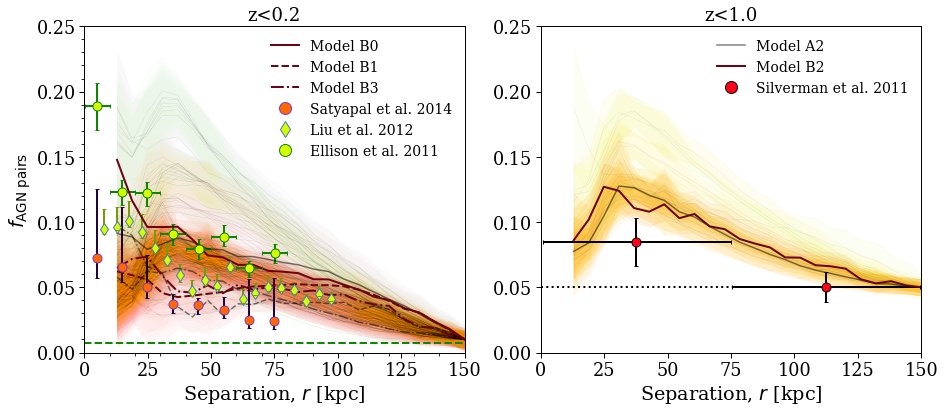

In [136]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

pt.plotSelectedModels(axs, selected_A, selected_B, r_kpc)
ls = ['-', '--', ':', '-.']

selected_A = [select_E11_A, select_S14_A, select_Sil11_A, select_L12_A]
selected_B = [select_E11_B, select_S14_B, select_Sil11_B, select_L12_B]
ls = ['-', '--', ':', '-.']
for idx, (mse_A, mse_B) in enumerate(zip(min_mse_arr_A, min_mse_arr_B)):
    mA, mB = selected_A[idx][0][mse_A], selected_B[idx][0][mse_B]
    sA, sB = selected_A[idx][1][mse_A], selected_B[idx][1][mse_B]
    if idx == 2:
        mA = mafl.normalizeAsymptote(mA, asymotote_value=asymotote_value[1])
        mB = mafl.normalizeAsymptote(mB, asymotote_value=asymotote_value[1])
        
        axs[1].plot(r_kpc[1:], mA[1:], lw=1.5, color='k', ls='-',\
                    zorder=2, label='Model A%d'%idx, alpha=0.5)
        axs[1].plot(r_kpc[1:], mB[1:], lw=2., color = '#6b0313', ls='-',\
                    zorder=2, label='Model B%d'%idx)
    else:
        mA = mafl.normalizeAsymptote(mA, asymotote_value=asymotote_value[0])
        mB = mafl.normalizeAsymptote(mB, asymotote_value=asymotote_value[0])
        
        axs[0].plot(r_kpc[1:], mA[1:], lw=1.5, color='k', ls=ls[idx], zorder=2,\
                    alpha=0.5)
        axs[0].plot(r_kpc[1:], mB[1:], lw=2., color = '#6b0313', ls=ls[idx], label='Model B%d'%idx, zorder=2)

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')
pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm AGN\ pairs}}$', 'z<0.2', ylim=[0., 0.25], legend=False)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0', ylim=[0., 0.25], legend=False)
pt.saveFig('Highlight_chosen_deciles_wistia_B.png')

Generate heatmaps

<AxesSubplot:title={'center':'Model B2 (Sil11)'}, xlabel='$\\tilde{X}_{\\rm off}$', ylabel='$t_{\\rm MM}$ [Gyr]'>

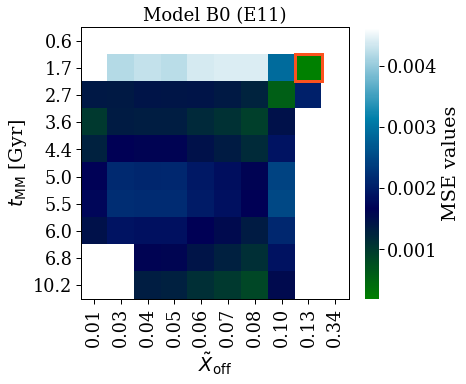

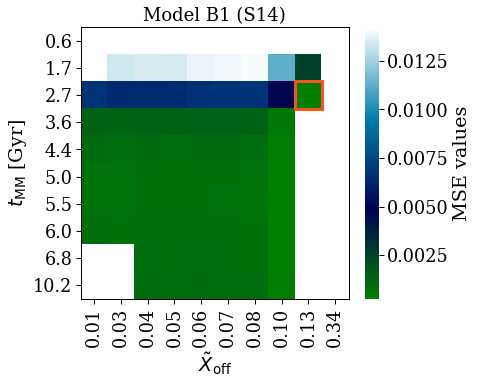

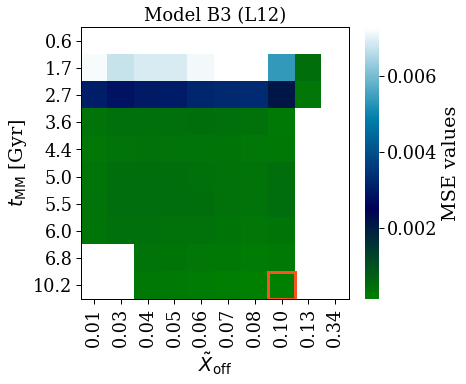

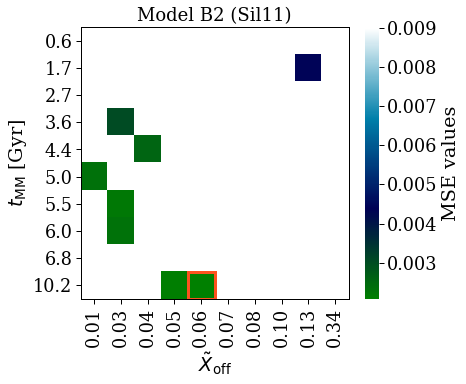

In [103]:
ib.reload(mafl)
ib.reload(pt)
pt.plotMatParameterSpace2d(names_E11_B, mse_E11_B, title='B0 (E11)', model_z=1)
pt.plotMatParameterSpace2d(names_S14_B, mse_S14_B, title='B1 (S14)', model_z=1)
pt.plotMatParameterSpace2d(names_L12_B, mse_L12_B, title='B3 (L12)', model_z=1)
pt.plotMatParameterSpace2d(names_Sil11_B, mse_Sil11_B, title='B2 (Sil11)', model_z=1)

['0.3', '0.9', '1.5', '2.0', '2.5', '3.0', '3.4', '4.0', '5.0', '9.3']
4 7


<AxesSubplot:title={'center':'Model A2 (Sil11)'}, xlabel='$\\tilde{X}_{\\rm off}$', ylabel='$t_{\\rm MM}$ [Gyr]'>

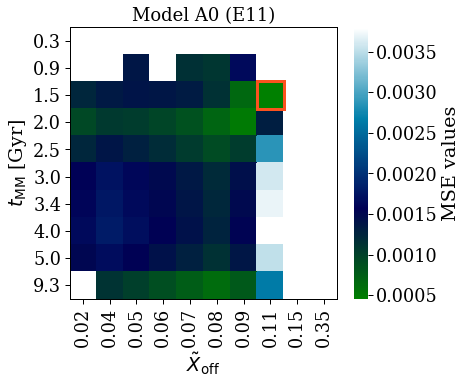

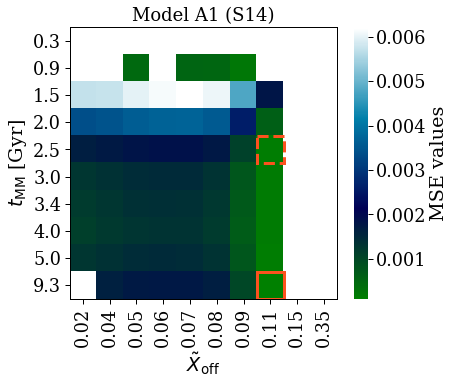

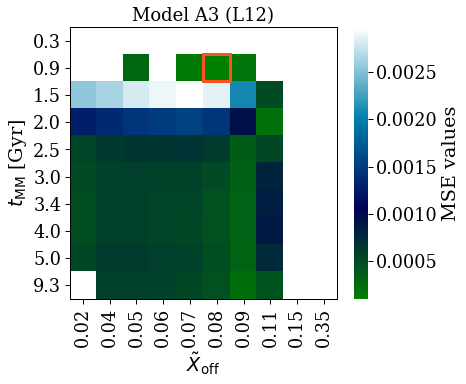

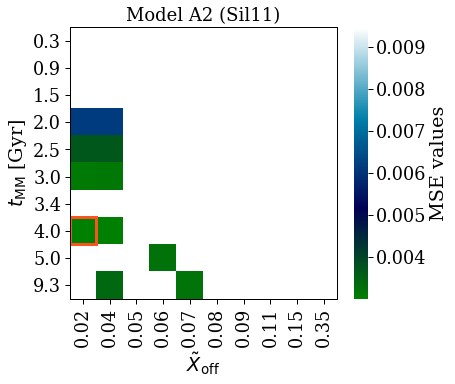

In [111]:
ib.reload(mafl)
ib.reload(pt)
pt.plotMatParameterSpace2d(names_E11_A, mse_E11_A, title='A0 (E11)', model_z=2)
pt.plotMatParameterSpace2d(names_S14_A, mse_S14_A, title='A1 (S14)', model_z=2, second_min=True)
pt.plotMatParameterSpace2d(names_L12_A, mse_L12_A, title='A3 (L12)', model_z=2)
pt.plotMatParameterSpace2d(names_Sil11_A, mse_Sil11_A, title='A2 (Sil11)', model_z=2)

### Generate a fit to know the power of the slope

Concatenate all the projected separations and fraction of AGNs for fitting purposes

In [10]:
X = np.concatenate([out_data[0][0], out_data[1][0], out_data[2][0], out_data[3][0]], axis=0)
Y = np.concatenate([out_data[0][1], out_data[1][1], out_data[2][1], out_data[3][1]], axis=0)

Concetenate all the errors on each data point for fitting purposes

In [11]:
xerr_all, yerr_all = np.array([]), np.array([])
for i in range(len(out_data)):
    xerr, yerr = out_data[i][2][1]+out_data[i][2][0], out_data[i][3][1]+out_data[i][3][0]
    xerr_all  = np.append(xerr_all, [np.abs(xerr)], axis=None)
    yerr_all = np.append(yerr_all, [np.abs(yerr)], axis=None)

Fitting the data

In [12]:
ib.reload(mafl)
output = mafl.performODR(X, Y, xerr_all, yerr_all)

imported_files/Modelling_AGN_fractions_from_literature.py:51: RuntimeWarning: invalid value encountered in power
  return  -beta[0]/np.power(x, beta[1])


Get confidence levels

In [13]:
pars = output.beta
fit_err = output.sd_beta
output.pprint()

nstd = 1
pars_up, pars_down = pars + nstd*fit_err, pars - nstd*fit_err

Beta: [-0.25525834  0.38327856]
Beta Std Error: [0.05149061 0.05188895]
Beta Covariance: [[ 0.00270984 -0.00267899]
 [-0.00267899  0.00275192]]
Residual Variance: 0.978392723476345
Inverse Condition #: 0.017832974110528085
Reason(s) for Halting:
  Sum of squares convergence


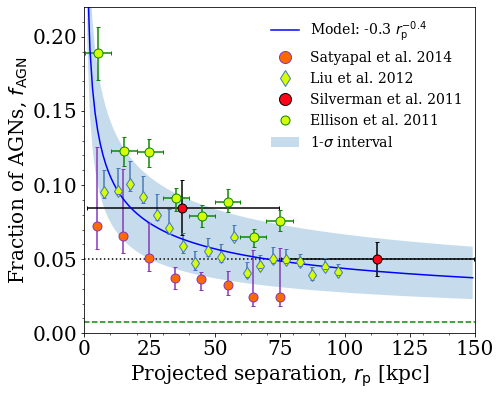

In [14]:
fig, ax = plt.subplots(1,1,figsize=(7,6))

x_new = np.arange(0.1, 150)
ax.plot(x_new, mafl.powerLaw(pars, x_new), 'b', label = r'Model: %.1f $r_{\rm p}^{-%.1f}$'%(pars[0], pars[1]))

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14, r_p_L12, f_agn_L12, Liu_12_err, Silverman_11, r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11, r_p_err_E11, f_agn_err_E11, ax=ax)

ax.fill_between(x_new, mafl.powerLaw(pars_up, x_new), mafl.powerLaw(pars_down, x_new), alpha=0.25, label=r'1-$\sigma$ interval')

# sets legend properties
l = ax.legend(loc='best',  fontsize=14, frameon=False)
for legend_handle in l.legendHandles[:-2]:
    legend_handle._legmarker.set_markersize(12)
    
plt.savefig('figures/close_p_fitted.pdf', facecolor='w', edgecolor='w', bbox_inches='tight')

fig, axs = plt.subplots(1,2,figsize=(15,6))
r_kpc = 1e3*r_p[1:]
ib.reload(pt)
ib.reload(mafl)
    
# generate models from the deciles
models_z0_2, std_z0_2 = mafl.generateDecileModels(frac_tmm_z0_2, frac_xoff_z0_2)
models_B, std_B = mafl.generateDecileModels(frac_tmm_z1, frac_xoff_z1)

# overplot with the data
pt.plotModels(axs, models_z0_2, std_z0_2, r_kpc, right=False)
pt.plotModels(axs, models_B, std_B, r_kpc, left=False)

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')
pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm halo\ pairs}}$', 'z<0.2', ylim=[0., 0.25], legend=False)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0', ylim=[0., 0.25], legend=False)
pt.saveFig('choosing_deciles_w_decz0_2_and_B.png')

Checking how many models pass our criteria

### Validation of the catAGN 

The AGN catalogue (catAGN) was motivated based on the models shown above. Where the suitable deciles that best represented the data were painted with AGNs. These make a small percent of the total AGN population. In order to validate the model, and it's assumptions, AGN-halo pairs were computed for the new catAGN, to see if it reproduces the close pairs trend.

In [10]:
redshift_limit = 2

# get shell volume and projected radius bins [Mpc]
r_p, shell_volume = aimm.shellVolume()
r_p_half, _ = aimm.shellVolume(num_bins=int(25/2) )

frac_cp_agn_arr = [0.03, 0.1, 0.15, 0.2]
frac_cp = 0.2
tmm_start = [1.2, 2.3, 3.7, 0.6]

In [11]:
#halo_lens = np.load('../Data/all_sky_halo_lengths_z%.1f.npy'%redshift_limit)
#rand_agn, cp_agn = mafl.getAGNlengths(redshift_limit=redshift_limit)

data_cp_dir = '../Data/pairs_z%.1f/cat_AGN_halo_pairs/'%redshift_limit
#n_pairs = np.load(data_cp_dir+'np_tmm2_xoff6_pixels_%s-%s_fracAGN%.2f.npy'%('000000', '000049', 0.03), allow_pickle=True)

data_dir = '../Data/pairs_z%.1f/Major_dv_pairs/'%redshift_limit
gamma_all = np.load(data_dir+'gamma_all_pixels.npy', allow_pickle=True)

In [12]:
list_model_names = []
tmm_start_val = tmm_start[1]
model_dirs = np.array(glob.glob(os.path.join(data_cp_dir,'np_*-*_fracAGN%.2f_%.1f_tmm_*_*_xoff_*.npy'%(frac_cp, tmm_start_val))))
list_model_names.append(model_dirs)

In [14]:
n_p_model = np.zeros((0, len(r_p)))
for m_dir in model_dirs:
    n_p = np.load(m_dir, allow_pickle=True)
    n_p_model = np.append(n_p_model, n_p, axis=0)
    print(n_p_model.shape)
n_p_mean_model = np.sum(n_p_model, axis=0)
n_p_std_model = np.std(n_p_model, axis=0)

(50, 26)
(100, 26)
(150, 26)
(200, 26)
(250, 26)
(300, 26)
(350, 26)
(400, 26)
(450, 26)
(500, 26)
(550, 26)
(600, 26)
(650, 26)
(700, 26)
(750, 26)


[1901.]
(767,)
[1901.]


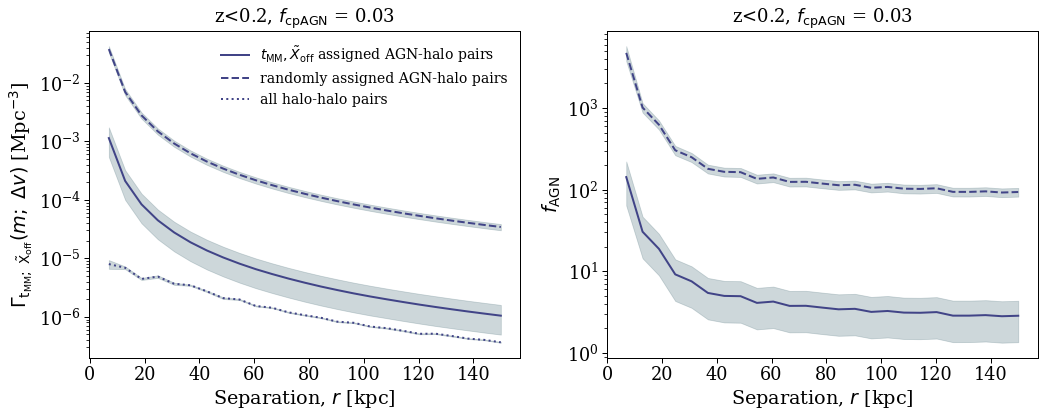

In [135]:
fig, ax = plt.subplots(1,2,figsize=(17,6))
ib.reload(mafl)
ib.reload(pt)
ib.reload(cswl)

g_cp_z0_2, g_rand_z0_2  = mafl.getFracAgnHaloPairsCp(ax, frac_cp_agn_arr[2:3], z=0.2, num_rp_bins=25)
g_cp_z0_2, g_rand_z0_2 = pt.plotErrors(ax, r_p, r_p, g_cp_z0_2 , g_rand_z0_2)

fig.patch.set_facecolor('white')
pt.saveFig('valid_catAGN_z%.1f.png'%0.2)

In [30]:
n_p_mean_model

array([1584.26266667, 1584.304     , 1584.576     , 1585.04933333,
       1585.94266667, 1586.92933333, 1588.57733333, 1590.64      ,
       1592.43866667, 1595.10666667, 1597.41333333, 1600.276     ,
       1603.144     , 1606.22133333, 1609.57866667, 1612.95466667,
       1616.816     , 1620.472     , 1624.58666667, 1628.43466667,
       1632.37866667, 1636.98266667, 1641.44266667, 1645.76      ,
       1650.28266667, 1654.808     ])

Now we can do a check if our model is redshift dependent. The above plot shows that our model criteria is well beahved for AGN-halo pairs at z<0.2, which allows for a fair comparison with the data (as most of the data is also for z<0.2). Below, the AGN-halo pairs for z<1 and z<2 is counted, and a fraction is obtained similarily (#AGN-halo_pairs/#halo-halo_pairs)

[254145.]
(767,)
[254145.]


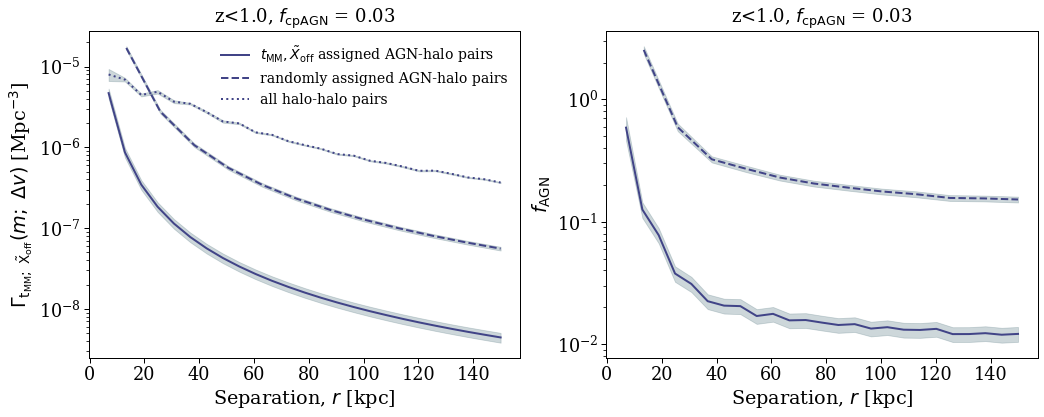

In [133]:
ib.reload(mafl)
ib.reload(pt)
ib.reload(cswl)
fig, ax = plt.subplots(1,2,figsize=(17,6))

g_cp_z1, g_rand_z1 = mafl.getFracAgnHaloPairsCp(ax, frac_cp_agn_arr[2:3], z=1)

g_cp_z1, g_rand_z1  = pt.plotErrors(ax, r_p, r_p_half, g_cp_z1 , g_rand_z1)
fig.patch.set_facecolor('white')
pt.saveFig('valid_catAGN_z%.1f.png'%1)

We repeat the same process for AGN-halo pairs, and halo-halo pairs below redshift 2

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(17,6))

g_cp_z2, g_rand_z2 = mafl.getFracAgnHaloPairsCp(ax, frac_cp_agn_arr[2:3], z=2)
g_cp_z2, g_rand_z2 = pt.plotErrors(ax, r_p, r_p_half, g_cp_z2 , g_rand_z2)

fig.patch.set_facecolor('white')
pt.saveFig('valid_catAGN_z%.1f.png'%2)

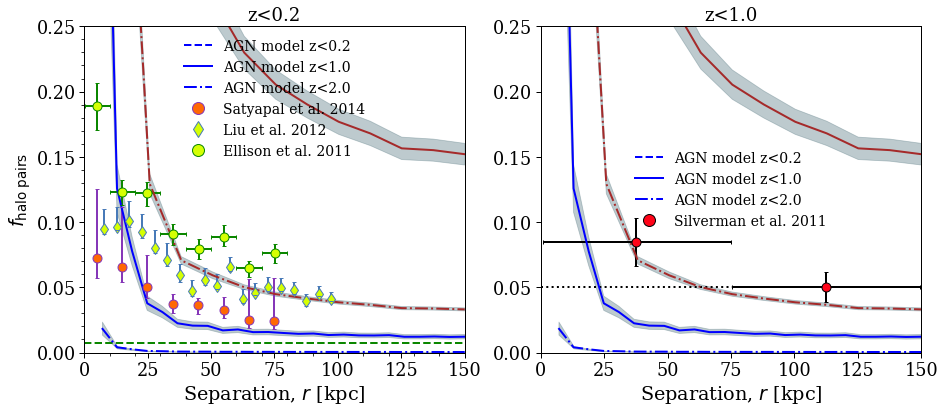

In [141]:
# The last step! see how out new catAGN compares with the data:
ib.reload(pt)
fig, axs = plt.subplots(1,2,figsize=(15,6))

for f, frac_cp_agn in enumerate(frac_cp_agn_arr[2:3]):
    label = r'$f_{cp\ AGN}$ = %.2f'%frac_cp_agn
    axs = pt.plotAGNModelZ(axs, 0, r_p, g_cp_z0_2, ls='--', redshift_limit=0.2)
    axs = pt.plotAGNModelZ(axs, 0, r_p, g_cp_z1, ls='-', redshift_limit=1)
    axs = pt.plotAGNModelZ(axs, 0, r_p, g_cp_z2, ls='-.', redshift_limit=2)
    
    axs = pt.plotAGNModelZ(axs, 1, r_p, g_cp_z0_2, ls='--', redshift_limit=0.2)
    axs = pt.plotAGNModelZ(axs, 1, r_p, g_cp_z1, ls='-',redshift_limit=1)
    axs = pt.plotAGNModelZ(axs, 1, r_p, g_cp_z2, ls='-.', redshift_limit=2)
    
    axs = pt.plotAGNModelZ(axs, 0, r_p, g_rand_z0_2, ls='--', redshift_limit=0.2, c='brown', if_cp=False)
    axs = pt.plotAGNModelZ(axs, 0, r_p_half, g_rand_z1, ls='-', redshift_limit=1, c='brown', if_cp=False)
    axs = pt.plotAGNModelZ(axs, 0, r_p_half, g_rand_z2, ls='-.', redshift_limit=2, c='brown', if_cp=False)
    
    axs = pt.plotAGNModelZ(axs, 1, r_p, g_rand_z0_2, ls='--', redshift_limit=0.2, c='brown', if_cp=False)
    axs = pt.plotAGNModelZ(axs, 1, r_p_half, g_rand_z1, ls='-',redshift_limit=1, c='brown', if_cp=False)
    axs = pt.plotAGNModelZ(axs, 1, r_p_half, g_rand_z2, ls='-.', redshift_limit=2, c='brown', if_cp=False)
    
_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)

fig.patch.set_facecolor('white')

pt.setLabel(axs[0], r'Separation, $r$ [kpc]', r'$f_{\rm halo\ pairs}}$', 'z<0.2', ylim=[0., 0.25], legend=True)
pt.setLabel(axs[1], r'Separation, $r$ [kpc]','', 'z<1.0', ylim=[0., 0.25], legend=True)
pt_sim.saveFig('model_validation_model1_tmm2_xoff_6_z2.png')

### Load the AGN pair files for the CP catalogues

In [13]:
redshift_limit = 2

data_dir = '../Data/pairs_z%.1f/Major_dv_pairs/'%redshift_limit
gamma_all = np.load(data_dir+'gamma_all_pixels.npy', allow_pickle=True)

get_all_pairs = True
pixel_no_cont_arr = sky.allPixelNames()

frac_cp = [0.1, 0.15, 0.2]
tmm_start_vals = [1.2, 2.3, 3.7, 0.6]
path_to_pairs = '../Data/pairs_z%.1f/cat_AGN_halo_pairs/'%redshift_limit

halo_lens = np.load('../Data/all_sky_halo_lengths_z%.1f.npy'%redshift_limit)
total_pairs = (halo_lens*(halo_lens-1))/2

r_p, shell_volume = aimm.shellVolume()

In [14]:
if get_all_pairs:
    pairs_rp = cswl.getAllSkyPairs(r_p, pixel_no_cont_arr, redshift_limit=redshift_limit)
    pairs_rp_sum = np.sum(pairs_rp, axis=0)
    pairs_rp_mean = np.mean(pairs_rp, axis=0)
else:
    pairs_rp_mean = np.load('../Data/pairs_z%.1f/Major_dv_pairs/pairs_rp_all_sky.npy'%redshift_limit, allow_pickle=True)

Load AGN-halo pairs of the non-CP catalogue

[array(['../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000750-000766.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000450-000499.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000250-000299.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000350-000399.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000200-000249.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000500-000549.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000150-000199.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000650-000699.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000300-000349.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000100-000149.npy',
       '../Data/pairs_z2.0/cat_AGN_halo_pairs/cat_without_CP/np_pixels_000000-000049.npy'

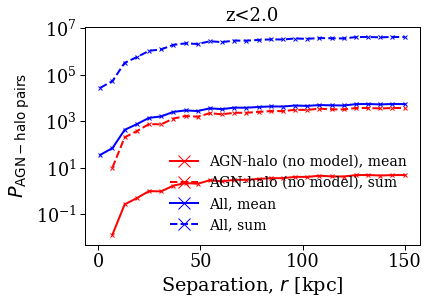

In [129]:
list_no_model_names = []
no_model_dirs = np.array(glob.glob(os.path.join(data_cp_dir, 'cat_without_CP', 'np_pixels_*-*.npy')))
list_no_model_names.append(no_model_dirs)
print(list_no_model_names)

n_p_no_model = np.zeros((0, len(r_p)))
for no_m_dirname in list_no_model_names[0]:
    no_m_file = np.load(no_m_dirname, allow_pickle=True)
    n_p_no_model = np.append(n_p_no_model, no_m_file, axis=0)
n_p_no_model_bins = n_p_no_model[:, 1:]-n_p_no_model[:, :-1] 
pairs_no_model_sum = np.sum(n_p_no_model_bins, axis=0)
pairs_no_model_mean = np.mean(n_p_no_model_bins, axis=0)
pairs_no_model_std = np.std(n_p_no_model_bins, axis=0)

fig, ax = plt.subplots(1, 1)
ax.plot(r_p[1:]*1e3, pairs_no_model_mean, 'r-x', label='AGN-halo (no model), mean')
ax.plot(r_p[1:]*1e3, pairs_no_model_sum, 'r--x', label='AGN-halo (no model), sum')
ax.plot(r_p*1e3, pairs_rp_mean, 'b-x', label='All, mean')
ax.plot(r_p*1e3, pairs_rp_sum, 'b--x', label='All, sum')
fig.patch.set_facecolor('white')
ax.set_yscale('log')
pt.setLabel(ax, r'Separation, $r$ [kpc]', r'$P_{\rm AGN-halo\ pairs}}$', 'z<%.1f'%redshift_limit)

Get the names of the files to open

In [16]:
list_pair_filenames = []
for t, tmm0 in enumerate(tmm_start_vals):
    list_f_cp_names = []
    for f, f_cp in enumerate(frac_cp):
        str_filenames = 'np_*-*_fracAGN%.2f_%.1f_tmm_*_*_xoff_*.npy'%(f_cp, tmm0)
        
        list_pairs = np.array(glob.glob(os.path.join(path_to_pairs, str_filenames)))
        list_f_cp_names.append(list_pairs)
        
    list_pair_filenames.append(list_f_cp_names)
list_pair_filenames = np.array(list_pair_filenames, dtype=object)
np.shape(list_pair_filenames)

(4, 3)

In [130]:
def openPairs(list_pair_filenames, model_no, frac_cp, r_bins=25,redshift_limit=2):
    """
    Function to get the sum of the pairs in every radial bin
    """
    halo_lens = np.load('../Data/all_sky_halo_lengths_z%.1f.npy'%redshift_limit)
    
    np_sum_all = np.zeros((len(frac_cp), r_bins))
    np_sum_all_std = np.zeros((len(frac_cp), r_bins))
    for f in range(len(frac_cp)):
        
        n_pairs_px = np.zeros((0, r_bins))
        agn_pairs_dir = list_pair_filenames[model_no, f]
        for files in agn_pairs_dir:
            n_pairs_temp = np.load(files, allow_pickle=True)
            n_pairs_temp = n_pairs_temp[:, 1:]-n_pairs_temp[:, :-1]
            
            # take the mean over all pixels
            n_pairs_px = np.vstack((n_pairs_px, n_pairs_temp))
        
        np_sum_all[f] = np.sum(n_pairs_px, axis=0)
        np_sum_all_std[f] = np.std(n_pairs_px, axis=0)        
    return np_sum_all, np_sum_all_std

In [131]:
np_model0, np_std_model0 = openPairs(list_pair_filenames, 0, frac_cp)
np_model1, np_std_model1 = openPairs(list_pair_filenames, 1, frac_cp)
np_model2, np_std_model2 = openPairs(list_pair_filenames, 2, frac_cp)
np_model3, np_std_model3 = openPairs(list_pair_filenames, 3, frac_cp)

In [132]:
np_std_model = [np_std_model0, np_std_model1, np_std_model2, np_std_model3]

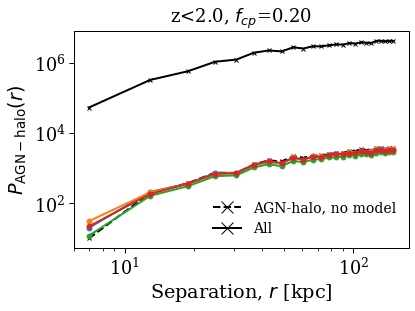

In [133]:
fig, ax = plt.subplots(1, 1)
ax.plot(r_p[1:]*1e3, pairs_no_model_sum, 'k--x', label='AGN-halo, no model')
ax.plot(r_p[1:]*1e3, pairs_rp_sum[1:], 'k-x', label='All')
for pairs_model in [np_model0, np_model1, np_model2, np_model3]:
    ax.plot(r_p[1:]*1e3, pairs_model[-1], marker='o')
fig.patch.set_facecolor('white')
ax.set_xscale('log')
ax.set_yscale('log')
pt.setLabel(ax, r'Separation, $r$ [kpc]', r'$P_{\rm AGN-halo}(r)}$', r'z<%.1f, $f_{cp}$=0.20'%redshift_limit)

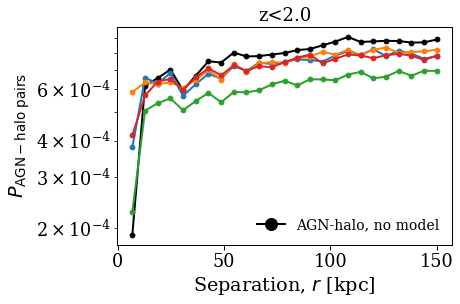

In [134]:
fig, ax = plt.subplots(1, 1)
ax.plot(r_p[1:]*1e3, pairs_no_model_sum/pairs_rp_sum[1:], 'k-o', label='AGN-halo, no model')
#ax.plot(r_p*1e3, pairs_rp_mean, 'bx', label='All')
for pairs_model in [np_model0, np_model1, np_model2, np_model3]:
    ax.plot(r_p[1:]*1e3, pairs_model[-1]/pairs_rp_sum[1:], marker='o')
fig.patch.set_facecolor('white')
ax.set_yscale('log')
pt.setLabel(ax, r'Separation, $r$ [kpc]', r'$P_{\rm AGN-halo\ pairs}}$', 'z<%.1f'%redshift_limit)

In [135]:
np_model0

array([[  18.,  177.,  325.,  618.,  693., 1130., 1443., 1317., 1792.,
        1647., 2002., 1964., 2191., 2434., 2391., 2559., 2480., 2900.,
        2706., 2722., 3100., 3102., 2995., 3048., 3101.],
       [  19.,  194.,  378.,  765.,  740., 1223., 1547., 1374., 2060.,
        1793., 2116., 2204., 2383., 2567., 2500., 2826., 2786., 3037.,
        2999., 2891., 3390., 3436., 3230., 3242., 3291.],
       [  20.,  212.,  356.,  722.,  695., 1195., 1502., 1357., 1968.,
        1745., 2160., 2118., 2317., 2494., 2466., 2683., 2719., 3053.,
        2895., 2969., 3229., 3402., 3204., 3197., 3228.]])

In [145]:
ul

array([2.21745509, 0.92713639, 0.97509598, 0.92858529, 1.00691039,
       0.98773311, 0.94600765, 0.90508261, 0.90340445, 0.89298857,
       0.92387911, 0.90443094, 0.93016867, 0.94265228, 0.95719021,
       0.86754402, 0.87266935, 0.87095874, 0.89891775, 0.87598684,
       0.89195472, 0.90392043, 0.90211174, 0.87050335, 0.87913086])

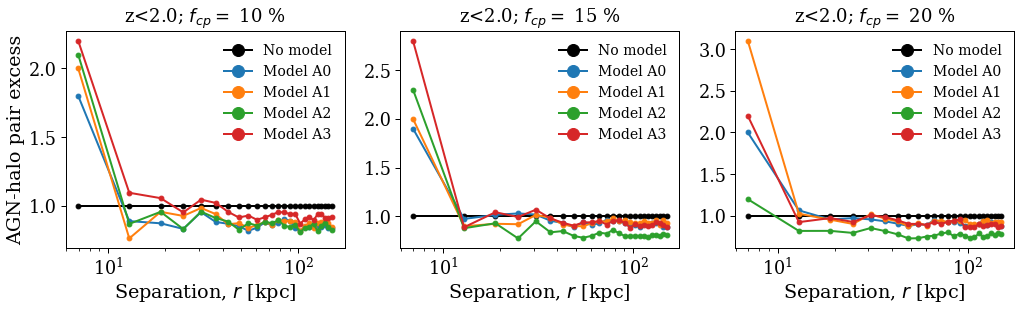

In [158]:
fig, axs = plt.subplots(1, 3, figsize=(17, 4))

for f in [0, 1, 2]:
    ax = axs[f]
    ax.plot(r_p[1:]*1e3, pairs_no_model_sum/pairs_no_model_sum, 'k-o', label='No model')
    #ax.plot(r_p*1e3, pairs_rp_mean, 'bx', label='All')
    for p, pairs_model in enumerate([np_model0, np_model1, np_model2, np_model3]):
        ax.plot(r_p[1:]*1e3, pairs_model[f]/pairs_no_model_sum, marker='o', label='Model A%d'%p)
    fig.patch.set_facecolor('white')
    ax.set_xscale('log')
    if f == 0:
        pt.setLabel(ax, r'Separation, $r$ [kpc]', 'AGN-halo pair excess', r'z<%.1f; $f_{cp}=$ %d %s'%(redshift_limit, frac_cp[f]*100, '%'))
    else:
        pt.setLabel(ax, r'Separation, $r$ [kpc]', '', r'z<%.1f; $f_{cp}=$ %d %s'%(redshift_limit, frac_cp[f]*100, '%'))
        
pt.saveFig('pairs_excess_fractions.png')

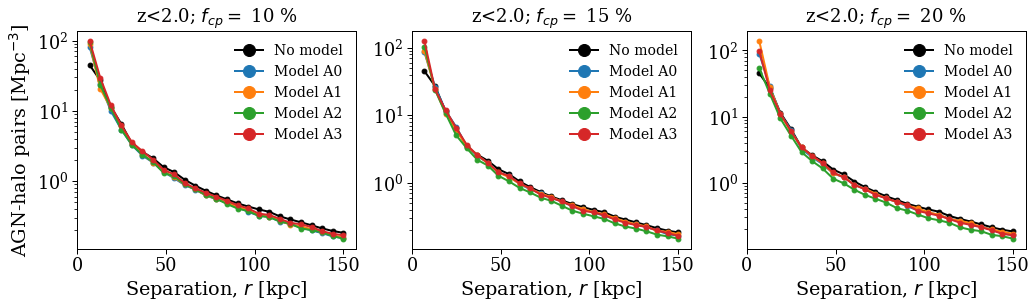

In [171]:
fig, axs = plt.subplots(1, 3, figsize=(17, 4))

for f in [0, 1, 2]:
    ax = axs[f]
    #ax.plot(r_p[1:]*1e3, 1/shell_volume/pairs_rp_sum[1:], 'k--', label='1/shell vol')
    
    ax.plot(r_p[1:]*1e3, pairs_no_model_sum/(pairs_rp_sum[1:]*shell_volume), 'k-o', label='No model')
    #ax.plot(r_p[1:]*1e3, pairs_rp_mean[1:]/shell_volume, 'bx', label='All')
    for p, pairs_model in enumerate([np_model0, np_model1, np_model2, np_model3]):
        ax.plot(r_p[1:]*1e3, pairs_model[f]/pairs_rp_sum[1:]/shell_volume, marker='o', label='Model A%d'%p)
    fig.patch.set_facecolor('white')
    ax.set_yscale('log')
    if f == 0:
        pt.setLabel(ax, r'Separation, $r$ [kpc]', r'AGN-halo pairs [Mpc$^{-3}$]', r'z<%.1f; $f_{cp}=$ %d %s'%(redshift_limit, frac_cp[f]*100, '%'))
    else:
        pt.setLabel(ax, r'Separation, $r$ [kpc]', '', r'z<%.1f; $f_{cp}=$ %d %s'%(redshift_limit, frac_cp[f]*100, '%'))

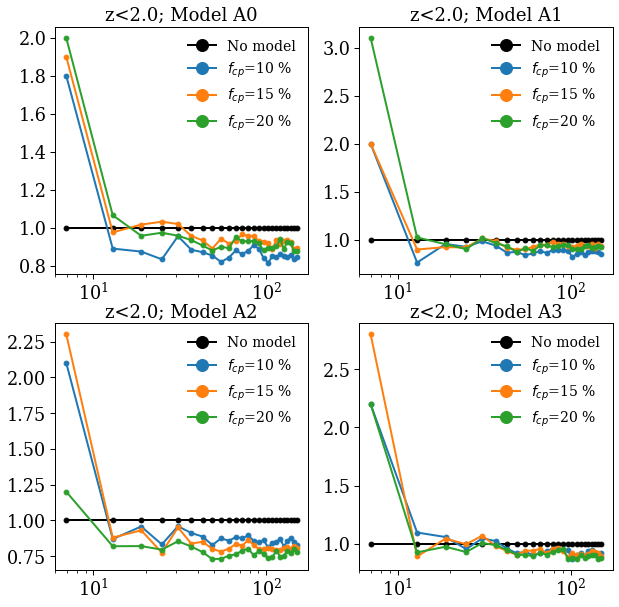

In [155]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
combo = [(0, 0), (0,1), (1, 0), (1,1)]
for p, pairs_model in enumerate([np_model0, np_model1, np_model2, np_model3]):
    ax = axs[combo[p]]
    ax.plot(r_p[1:]*1e3, pairs_no_model_sum/pairs_no_model_sum, 'k-o', label='No model')
    #ax.plot(r_p*1e3, pairs_rp_mean, 'bx', label='All')
    for f in [0, 1, 2]:
        ax.plot(r_p[1:]*1e3, pairs_model[f]/pairs_no_model_sum, marker='o', label=r'$f_{cp}$=%d %s'%(frac_cp[f]*100, '%'))
    fig.patch.set_facecolor('white')
    ax.set_xscale('log')
    pt.setLabel(ax, '', '', r'z<%.1f; Model A%d'%(redshift_limit, p))

pt.saveFig('pairs_excess_models.png')

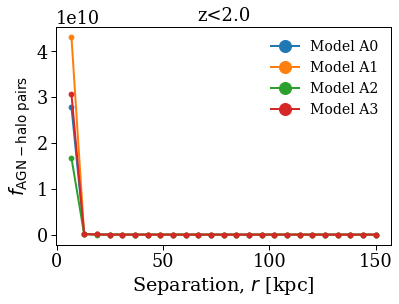

In [62]:
fig, ax = plt.subplots(1, 1)
#ax.plot(r_p[1:]*1e3, pairs_no_model_mean/pairs_rp_mean[1:], 'rx', label='AGN-halo, no model')
f_no_model_agn = pairs_no_model_mean/pairs_rp_mean[1:]
#ax.plot(r_p[1:]*1e3, pairs_no_model_mean/pairs_rp_mean[1:], 'b-', label='AGN-halo, no model/ All')
for p, pairs_model in enumerate([np_model0, np_model1, np_model2, np_model3]):
    f_model_agn = pairs_model[-1]/pairs_no_model_mean
    ax.plot(r_p[1:]*1e3, f_model_agn/pairs_no_model_mean/shell_volume, marker='o', label='Model A%d'%p)
fig.patch.set_facecolor('white')
#ax.set_yscale('log')
pt.setLabel(ax, r'Separation, $r$ [kpc]', r'$f_{\rm AGN-halo\ pairs}}$', 'z<%.1f'%redshift_limit)

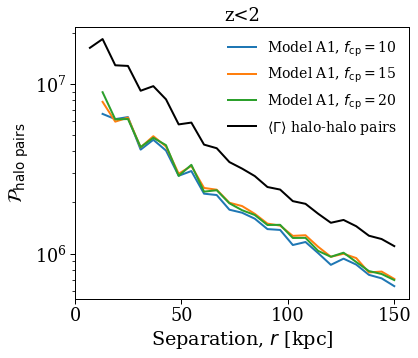

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
        

for i in [0, 1, 2]:
    ratio_pairs = np_model1[i]/shell_volume
    ax.plot((1e3*r_p[2:]), ratio_pairs[1:], label=r'Model A1, $f_{\rm cp}=$%d'%(frac_cp[i]*100))
    
ax.plot((1e3*r_p[1:]), pairs_rp_mean[1:]/shell_volume, 'k-', label=r'$\langle \Gamma \rangle$ halo-halo pairs')
#ax.plot((1e3*r_p[1:]), gamma_all[0], 'k-', label=r'$\langle \Gamma \rangle$ halo-halo pairs')
ax.set_yscale('log')
fig.patch.set_facecolor('white')
pt.setLabel(ax, r'Separation, $r$ [kpc]', r'$\mathcal{P}_{\rm halo\ pairs}}$', 'z<2', legend=True)

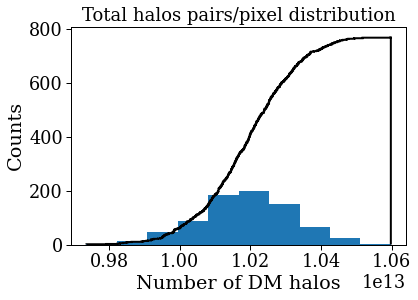

In [53]:
fig, ax = plt.subplots(1, 1)
ax.hist(total_pairs, bins=10)
ax.hist(total_pairs, bins=1000, cumulative=True, histtype='step', color='k', lw=2)
fig.patch.set_facecolor('white')

pt.setLabel(ax, r'Number of DM halos', r'Counts', 'Total halos pairs/pixel distribution', legend=False)

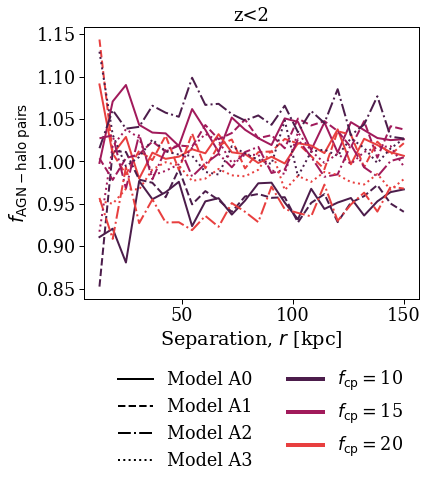

In [25]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, 1, figsize=(6,5))
        
r_p, shell_volume = aimm.shellVolume()
ls = ['-', '--', '-.', ':']
pal = sns.color_palette('rocket', 4).as_hex()
np_model_all = [np_model0, np_model1, np_model2, np_model3] 
model_names = ['Model A%d'%d for d in np.arange(4)]

f_halo_halo = pairs_rp_mean[1:]/shell_volume

for n, np_model in enumerate(np_model_all):
    for i in [0, 1, 2]:
        f_agn_halo = np_model[i]/np.mean(np_model, axis=0)
        
        ax.plot((1e3*r_p[2:]), f_agn_halo[1:], pal[i], ls=ls[n])
        if n == 0:
            model_names.append(r'$f_{\rm cp}=$%d'%(frac_cp[i]*100))
fig.patch.set_facecolor('white')
#ax.set_yscale('log')
pt.setLabel(ax, r'Separation, $r$ [kpc]', r'$f_{\rm AGN-halo\ pairs}}$', 'z<2', legend=False)

custom_lines = [Line2D([0], [0], color='k', lw=2, ls=ls[0]),
                Line2D([0], [0], color='k', lw=2, ls=ls[1]),
                Line2D([0], [0], color='k', lw=2, ls=ls[2]),
                Line2D([0], [0], color='k', lw=2, ls=ls[3]),
                Line2D([0], [0], color=pal[0], lw=4, ls=ls[0]),
                Line2D([0], [0], color=pal[1], lw=4, ls=ls[0]),
                Line2D([0], [0], color=pal[2], lw=4, ls=ls[0])]
ax.legend(custom_lines, model_names, bbox_to_anchor=(1, -0.2), frameon=False, ncol=2)

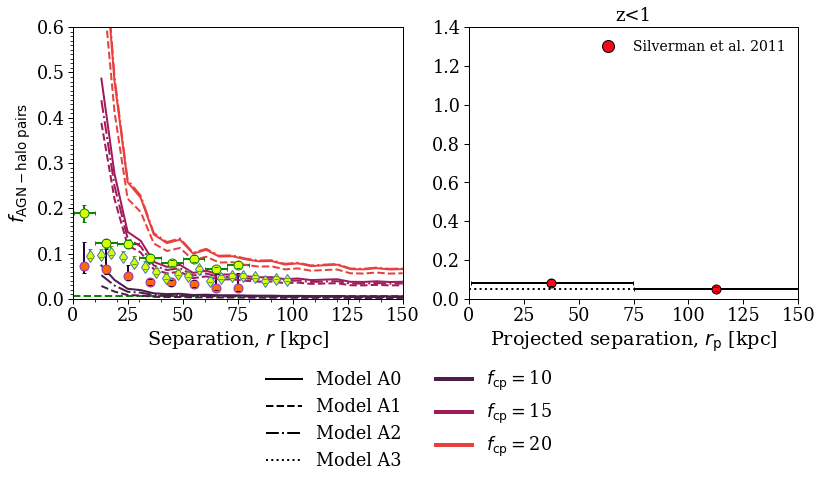

In [149]:
from matplotlib.lines import Line2D
fig, axs = plt.subplots(1, 2, figsize=(13,5))
        
r_p, shell_volume = aimm.shellVolume()
#ax.plot((1e3*r_p[1:]), , 'k-', label=r'1/$V_{\rm shell}$')
f_halo_halo = pairs_rp_mean[1:]/shell_volume
ls = ['-', '--', '-.', ':']
pal = sns.color_palette('rocket', 4).as_hex()
np_model_all = [np_model1, np_model2, np_model3] 

model_names = ['Model A%d'%d for d in np.arange(4)]

#f_cp_label = [r'$f_{\rm cp}=$%d'%(frac_cp[i]*100) for i in range( len(frac_cp) )]
for n, np_model in enumerate(np_model_all):
    if n != 3:
        ax = axs[0]
    else:
        ax = axs[1]
    for i in [0, 1, 2]:
        f_agn_halo = np_model[i]/shell_volume
        ax.plot((1e3*r_p[2:]), f_agn_halo[1:]/f_halo_halo[1:], pal[i], ls=ls[n])
        if n == 0:
            model_names.append(r'$f_{\rm cp}=$%d'%(frac_cp[i]*100))
fig.patch.set_facecolor('white')
#ax.set_yscale('log')

_, _ = pt.plotAllLiteraturePlots(Satyapal_14, r_p_err_S14, f_agn_err_S14,\
                                 r_p_L12, f_agn_L12, Liu_12_err, Silverman_11,\
                                 r_p_err_Sil11, f_agn_err_Sil11, r_p_E11, f_agn_E11,\
                                 r_p_err_E11, f_agn_err_E11, axs=axs, ymax=1.4)
pt.setLabel(ax, r'Separation, $r$ [kpc]', r'$f_{\rm AGN-halo\ pairs}}$', legend=False, ylim=[0, 0.6])

custom_lines = [Line2D([0], [0], color='k', lw=2, ls=ls[0]),
                Line2D([0], [0], color='k', lw=2, ls=ls[1]),
                Line2D([0], [0], color='k', lw=2, ls=ls[2]),
                Line2D([0], [0], color='k', lw=2, ls=ls[3]),
                Line2D([0], [0], color=pal[0], lw=4, ls=ls[0]),
                Line2D([0], [0], color=pal[1], lw=4, ls=ls[0]),
                Line2D([0], [0], color=pal[2], lw=4, ls=ls[0])]
ax.legend(custom_lines, model_names, bbox_to_anchor=(1.5, -0.2), frameon=False, ncol=2)